Import libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the Iris dataset into pandas DataFrame

In [6]:
from sklearn.datasets import load_iris 
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

Display the first 5 and the last 5 rows of the dataset

In [7]:
print("First 5 rows:")
print(iris_df.head())
print("\nLast 5 rows:")
print(iris_df.tail())

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Last 5 rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149           

Print the summary statistics and check for any missing/null values in the dataset

In [8]:
print("\nSummary statistics:")
print(iris_df.describe())
print("\nMissing/null values:")
print(iris_df.isnull().sum())


Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Missing/null values:
sepal length (cm)    0
sepal 

Display the datatype of each column

In [9]:
print("\nDatatype of each column:")
print(iris_df.dtypes)



Datatype of each column:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object


Data Manipulation

Add a new column named 'sepal_area' that is the product of sepal length and sepal width

In [13]:
iris_df['sepal_area'] = iris_df['sepal length (cm)'] * iris_df['sepal width (cm)']
print(iris_df['sepal_area'])

0      17.85
1      14.70
2      15.04
3      14.26
4      18.00
       ...  
145    20.10
146    15.75
147    19.50
148    21.08
149    17.70
Name: sepal_area, Length: 150, dtype: float64


Create a new DataFrame that contains only the data for the 'setosa' species

In [14]:
setosa_df = iris_df[iris_df['species'] == 'setosa']

Sort the original DataFrame by 'petal_length' in descending order

In [16]:
iris_df_sorted = iris_df.sort_values(by='petal length (cm)', ascending=False)
print(iris_df_sorted)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
118                7.7               2.6                6.9               2.3   
122                7.7               2.8                6.7               2.0   
117                7.7               3.8                6.7               2.2   
105                7.6               3.0                6.6               2.1   
131                7.9               3.8                6.4               2.0   
..                 ...               ...                ...               ...   
16                 5.4               3.9                1.3               0.4   
35                 5.0               3.2                1.2               0.2   
14                 5.8               4.0                1.2               0.2   
13                 4.3               3.0                1.1               0.1   
22                 4.6               3.6                1.0               0.2   

     species  sepal_area  


Filter the data to include only those records with a petal width greater than 1.5 cm

In [18]:
filtered_df = iris_df[iris_df['petal width (cm)'] > 1.5]
print(filtered_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
56                 6.3               3.3                4.7               1.6   
70                 5.9               3.2                4.8               1.8   
77                 6.7               3.0                5.0               1.7   
83                 6.0               2.7                5.1               1.6   
85                 6.0               3.4                4.5               1.6   
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   
105                7.6               3.0                6.6               2.1   
106                4.9      

Calculate the mean sepal width for each of the species present in the dataset

In [21]:
mean_sepal_width = iris_df.groupby('species')['sepal width (cm)'].mean()
print(mean_sepal_width)

species
0    3.428
1    2.770
2    2.974
Name: sepal width (cm), dtype: float64


Data Visualization

Plot a histogram of the 'sepal_length' for the entire dataset

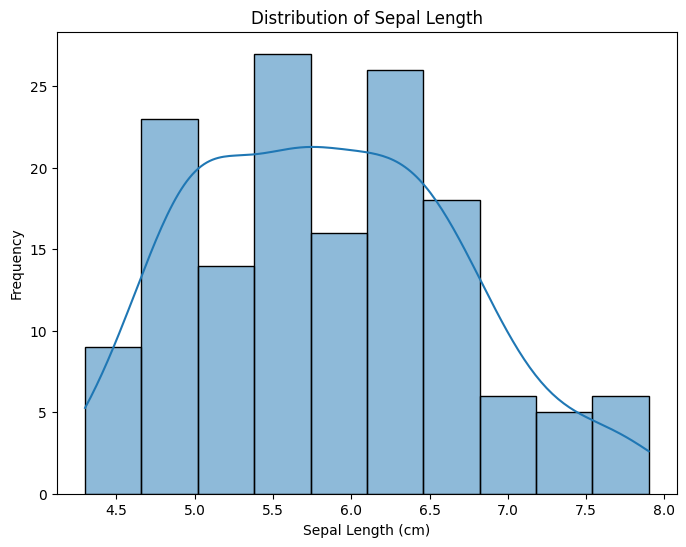

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(iris_df['sepal length (cm)'], bins=10, kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

Create a scatter plot to visualize the relationship between 'sepal_length' and 'sepal_width'. Color the points by the species of the iris.

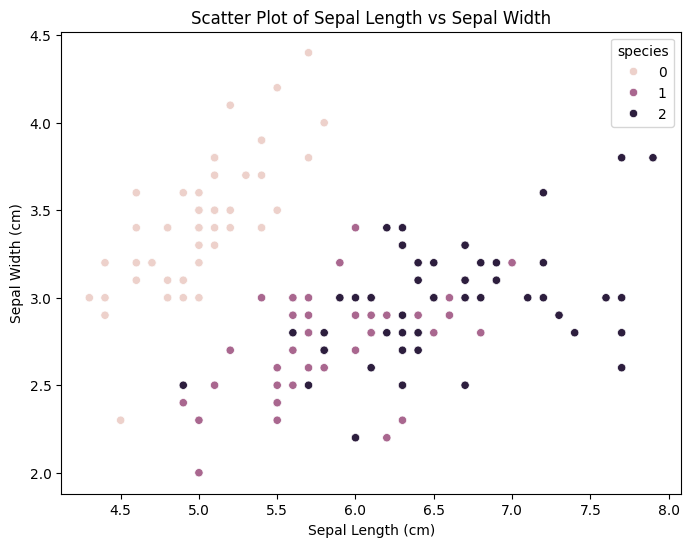

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

Use a boxplot to show the distribution of 'petal_length' for each species

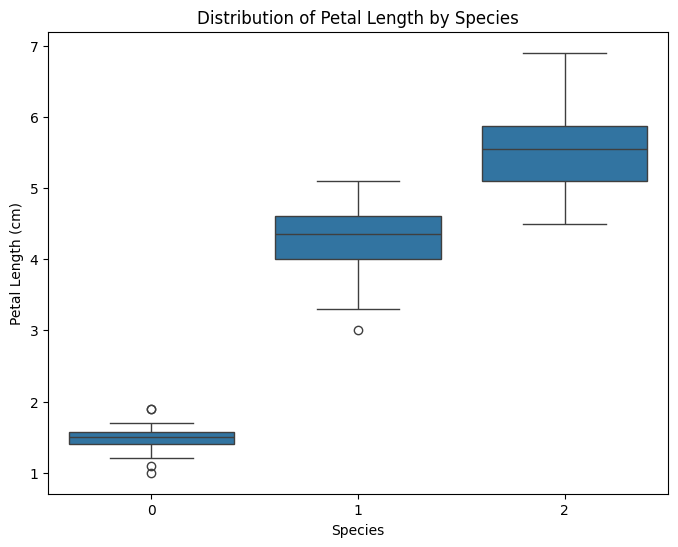

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

Create a pairplot for all numerical columns, colored by species

<Figure size 1000x800 with 0 Axes>

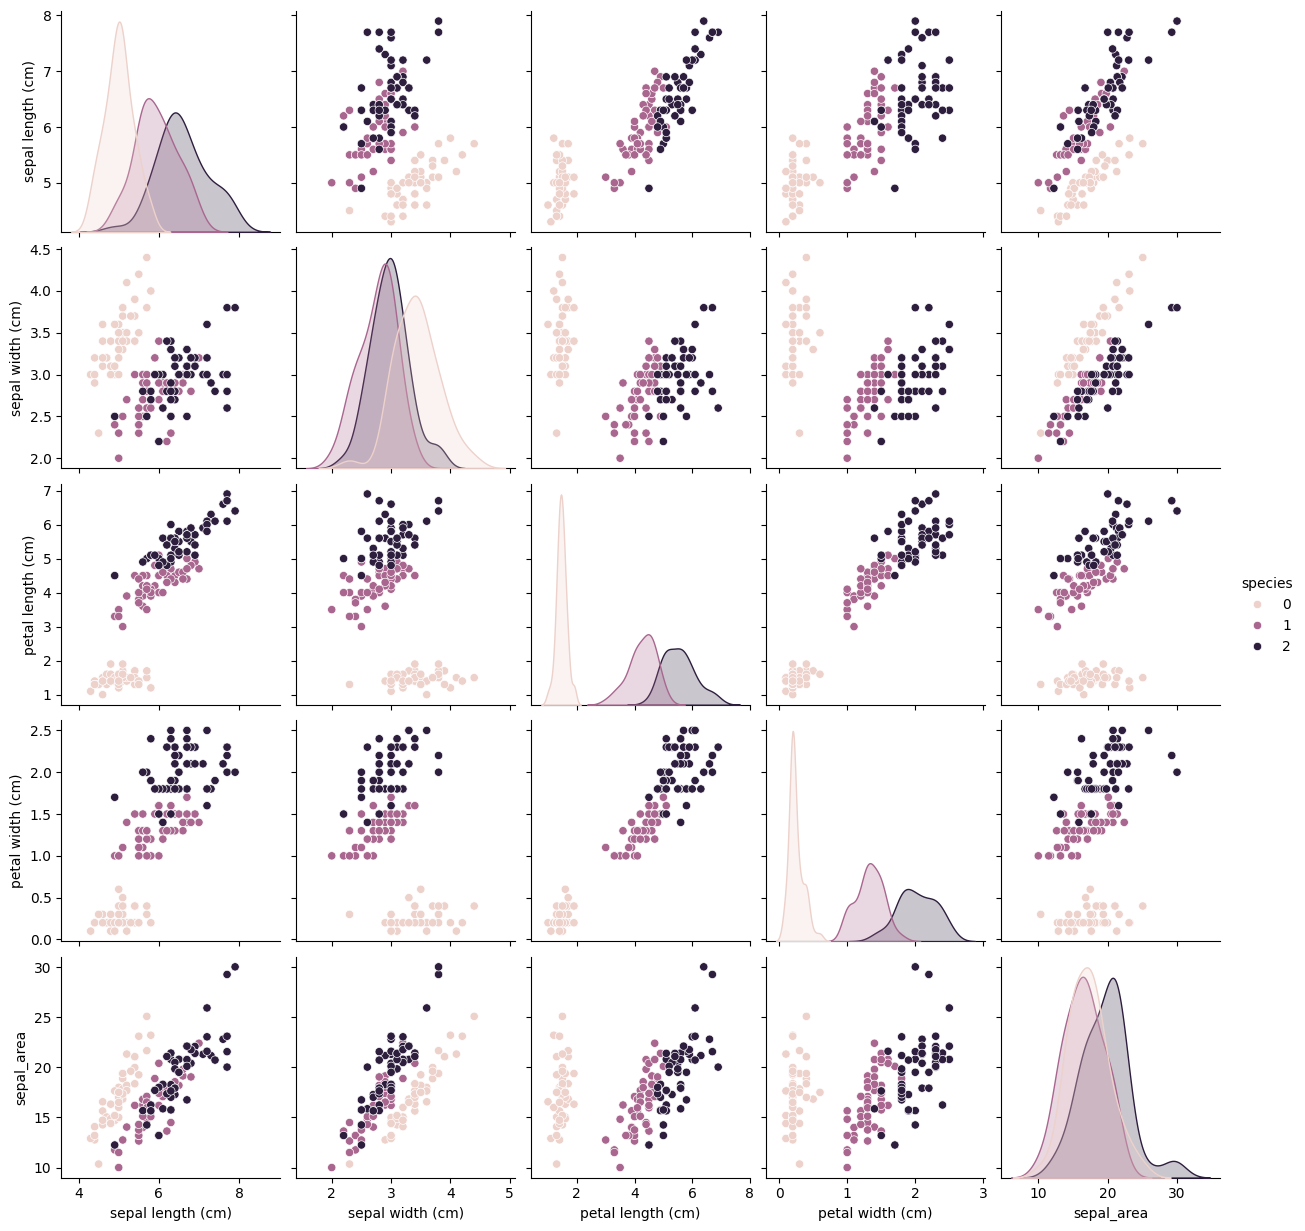

In [26]:
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='species')
plt.show()